In [1]:
import numpy as np
import pandas as pd
import seaborn

In [2]:
t = seaborn.load_dataset('titanic')
t.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# How many passengers are described in the dataset?

num_passengers = len(t)
print(f"Number of passengers in the dataset: {num_passengers}")

Number of passengers in the dataset: 891


In [4]:
# How many distinct values are in the 'who' column?

distinct_who_values = t['who'].nunique()
print(f"Number of distinct values in the 'who' column: {distinct_who_values}")

Number of distinct values in the 'who' column: 3


In [5]:
# How many missing values do you find in each data column?

missing_values = t.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [6]:
# Does the data contain passengers over 60 years old? How many?

passengers_over_60 = t[t['age'] > 60]
num_passengers_over_60 = len(passengers_over_60)
print(f"Number of passengers over 60 years old: {num_passengers_over_60}")

Number of passengers over 60 years old: 22


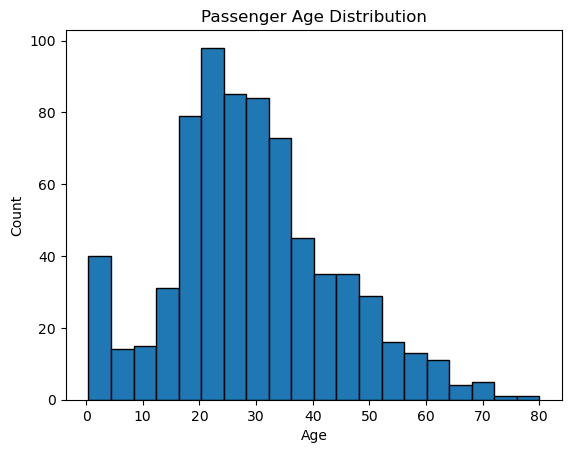

In [7]:
# What is the passenger age distribution? (Plot it.)

import matplotlib.pyplot as plt
plt.hist(t['age'].dropna(), bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passenger Age Distribution')
plt.show()

In [8]:
# What are the 3-quantiles of the passenger age distribution?

age_quantiles = t['age'].quantile([0.25, 0.5, 0.75])
print("Age 3-quantiles:")
print(age_quantiles)

Age 3-quantiles:
0.25    20.125
0.50    28.000
0.75    38.000
Name: age, dtype: float64


In [9]:
# How will you drop all passengers with no embarked data?

t = t.dropna(subset=['embarked'])

In [10]:
# What is the average, minimum, and maximum fares paid by the passengers?

average_fare = t['fare'].mean()
minimum_fare = t['fare'].min()
maximum_fare = t['fare'].max()
print(f"Average fare: {average_fare:.2f}")
print(f"Minimum fare: {minimum_fare:.2f}")
print(f"Maximum fare: {maximum_fare:.2f}")

Average fare: 32.10
Minimum fare: 0.00
Maximum fare: 512.33


In [11]:
# What are the proportions of passengers in different classes?

class_proportions = t['class'].value_counts(normalize=True)
print("Proportions of passengers in different classes:")
print(class_proportions)

Proportions of passengers in different classes:
class
Third     0.552306
First     0.240720
Second    0.206974
Name: proportion, dtype: float64


In [12]:
# What is the female to male ratio in each travel class?

gender_ratio = t.groupby(['class', 'sex'])['sex'].count() / t.groupby('class')['sex'].count()
print("Female to male ratio in each travel class:")
print(gender_ratio)

Female to male ratio in each travel class:
class   sex   
First   female    0.429907
        male      0.570093
Second  female    0.413043
        male      0.586957
Third   female    0.293279
        male      0.706721
Name: sex, dtype: float64


In [13]:
# What fraction survived?

survival_rate = t['survived'].mean()
print(f"Survival rate: {survival_rate:.2f}")

Survival rate: 0.38


In [14]:
# Are the survival rates of male and female passengers different?

survival_by_gender = t.groupby('sex')['survived'].mean()
print("Survival rates by gender:")
print(survival_by_gender)

Survival rates by gender:
sex
female    0.740385
male      0.188908
Name: survived, dtype: float64


In [15]:
# Are the survival rates of first, second, and third class passengers different?

survival_by_class = t.groupby('class')['survived'].mean()
print("Survival rates by class:")
print(survival_by_class)

Survival rates by class:
class
First     0.626168
Second    0.472826
Third     0.242363
Name: survived, dtype: float64


In [16]:
# How can one print a table of survival rate dependencies on class and gender?

survival_table = t.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
print("Survival rate table:")
print(survival_table)

Survival rate table:
sex       female      male
class                     
First   0.967391  0.368852
Second  0.921053  0.157407
Third   0.500000  0.135447


In [17]:
# How can one print a table with the number of survivors and average fare for each gender and cabin?

survivors_and_fare_table = t.groupby(['class', 'sex'])[['survived', 'fare']].agg({'survived': 'sum', 'fare': 'mean'})
print("Survivors and average fare table:")
print(survivors_and_fare_table)

Survivors and average fare table:
               survived        fare
class  sex                         
First  female        89  106.693750
       male          45   67.226127
Second female        70   21.970121
       male          17   19.741782
Third  female        72   16.118810
       male          47   12.661633
